<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [0]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.3.0-tf


## Step 1: Data Loading

In [0]:
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 

# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Assign the 10 types of food from your .txt file to a list variable 'food_list'
   
label_file = os.path.join(base_dir, '13.txt') 
# Refer to the report Appendix
# Please enter the name of .txt file which contains a list of food assigned to you
# Make sure you save the .txt file in your base_dir

with open(label_file, 'r') as f:
    x = f.readlines()
    
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
        
#copy the first 750 images to train folder
for item in food_list:
    train_food_dir = os.path.join(train_dir, item)
    os.mkdir(train_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[:750]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(train_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the following 200 images [750:950] to validation folder
for item in food_list:
    validation_food_dir = os.path.join(validation_dir, item)
    os.mkdir(validation_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[750:950]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(validation_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the remaining 50 images [950:1000] to test folder
for item in food_list:
    test_food_dir = os.path.join(test_dir, item)
    os.mkdir(test_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[950:1000]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(test_food_dir, fname)
        shutil.copyfile(src, dst)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\DL_Notebk\\train'

In [0]:
#run if folders already created
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 
# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
#run for GitHub Colab
!git clone "https://github.com/BenjLiew/DL_Assg1.git"


Cloning into 'DL_Assg1'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10050 (delta 5), reused 7 (delta 2), pack-reused 10039
Receiving objects: 100% (10050/10050), 474.95 MiB | 12.99 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (10002/10002), done.


In [0]:
#GitHub Colab directory
# Directories for your training, validation and test splits
train_dir = '/content/DL_Assg1/train'
validation_dir = '/content/DL_Assg1/validation'
test_dir = '/content/DL_Assg1/test'

In [0]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Step 2:  Develop the Image Classification Models

### MobileNet (frozen)

In [0]:
# Build the Model
from tensorflow.keras.applications import MobileNet
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#MobileNet convbase
conv_base2 = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#freezing layers 
conv_base2.trainable = False

model2 = models.Sequential()
model2.add(conv_base2) #MobileNet pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 93s 123ms/step - loss: 1.3242 - acc: 0.6160 - val_loss: 0.9144 - val_acc: 0.7235
Epoch 2/30
750/750 [==============================] - 92s 122ms/step - loss: 0.9726 - acc: 0.7184 - val_loss: 0.8163 - val_acc: 0.7605
Epoch 3/30
750/750 [==============================] - 92s 123ms/step - loss: 0.8926 - acc: 0.7429 - val_loss: 0.8523 - val_acc: 0.7680
Epoch 4/30
750/750 [==============================] - 91s 121ms/step - loss: 0.8206 - acc: 0.7707 - val_loss: 1.0075 - val_acc: 0.7605
Epoch 5/30
750/750 [==============================] - 92s 122ms/step - loss: 0.8060 - acc: 0.7729 - val_loss: 0.8791 - val_acc: 0.7710
Epoch 6/30
750/750 [==============================] - 92s 123ms/step - loss: 0.7416 - acc: 0.7872 - val_loss: 0.9027 - val_acc: 0.7720
Epoch 7/30
750/750 [========

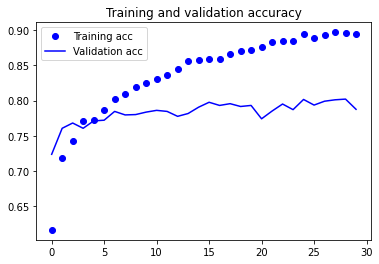

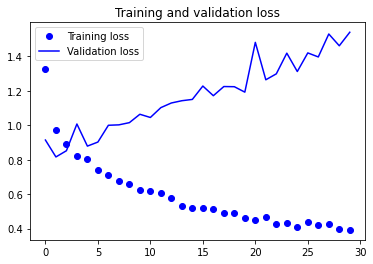

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.777999997138977


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_Frozen).h5')
model2.save('food_model_(MobileNet_Frozen)backup.h5')

### MobileNet unfrozen (All layers)

In [0]:
# Build the Model
from tensorflow.keras.applications import MobileNet
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#MobileNet convbase
conv_base2 = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #MobileNet pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 105s 139ms/step - loss: 1.4906 - acc: 0.5555 - val_loss: 0.9424 - val_acc: 0.7295
Epoch 2/30
750/750 [==============================] - 104s 139ms/step - loss: 1.0905 - acc: 0.6804 - val_loss: 0.8265 - val_acc: 0.7795
Epoch 3/30
750/750 [==============================] - 103s 138ms/step - loss: 0.9833 - acc: 0.7087 - val_loss: 0.7712 - val_acc: 0.7995
Epoch 4/30
750/750 [==============================] - 104s 139ms/step - loss: 0.9007 - acc: 0.7316 - val_loss: 0.6719 - val_acc: 0.8160
Epoch 5/30
750/750 [==============================] - 103s 138ms/step - loss: 0.8212 - acc: 0.7493 - val_loss: 1.0261 - val_acc: 0.7890
Epoch 6/30
750/750 [==============================] - 103s 138ms/step - loss: 0.7474 - acc: 0.7771 - val_loss: 0.8174 - val_acc: 0.8015
Epoch 7/30
750/750 [==

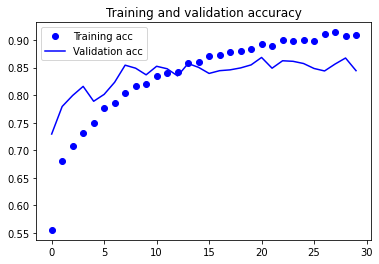

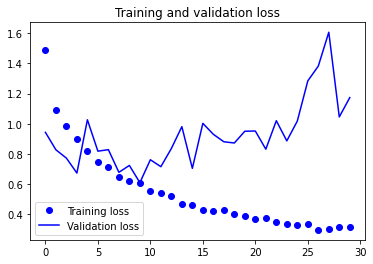

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8399999737739563


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_unfrozen).h5')
model2.save('food_model_(MobileNet_unfrozen)backup.h5')

### MobileNet unfrozen (All layers) + regularizer

In [0]:
# Build the Model
from tensorflow.keras.applications import MobileNet
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#MobileNet convbase
conv_base2 = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #MobileNet pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
750/750 [==============================] - 101s 135ms/step - loss: 1.9031 - acc: 0.5669 - val_loss: 1.2688 - val_acc: 0.7085
Epoch 2/30
750/750 [==============================] - 102s 136ms/step - loss: 1.3441 - acc: 0.6719 - val_loss: 0.9855 - val_acc: 0.7715
Epoch 3/30
750/750 [==============================] - 102s 135ms/step - loss: 1.1143 - acc: 0.7237 - val_loss: 0.8404 - val_acc: 0.7910
Epoch 4/30
750/750 [==============================] - 102s 136ms/step - loss: 0.9510 - acc: 0.7471 - val_loss: 0.7187 - val_acc: 0.8175
Epoch 5/30
750/750 [==============================] - 102s 136ms/step - loss: 0.8486 - acc: 0.7595 - val_loss: 0.6858 - val_acc: 0.8205
Epoch 6/30
750/750 [==============================] - 101s 135ms/step - loss: 0.7675 - acc: 0.7791 - val_loss: 0.5944 - val_acc: 0.8435
Epoch 7/30
750/750 [==============================] - 102s 136ms/step - loss: 0.7074 - acc: 0.7956

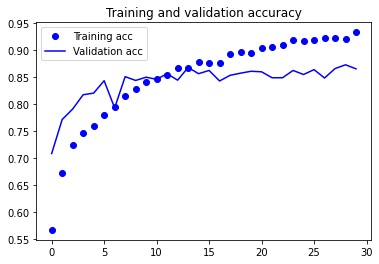

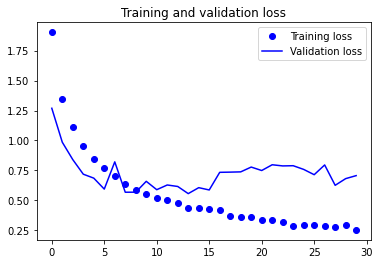

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8640000224113464


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_unfrozen_regularizer).h5')
model2.save('food_model_(MobileNet_unfrozen_regularizer)backup.h5')

### MobileNet unfrozen (dw6) + regularizer 

In [0]:
# Build the Model
from tensorflow.keras.applications import MobileNet
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#MobileNet convbase
conv_base2 = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

set_trainable = False
for layer in conv_base2.layers:
    if layer.name == 'conv_dw_6': 
        set_trainable = True # after layer, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model2 = models.Sequential()
model2.add(conv_base2) #MobileNet pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 78s 105ms/step - loss: 1.8809 - acc: 0.5563 - val_loss: 1.1709 - val_acc: 0.7400
Epoch 2/30
750/750 [==============================] - 77s 103ms/step - loss: 1.3618 - acc: 0.6704 - val_loss: 1.1801 - val_acc: 0.7430
Epoch 3/30
750/750 [==============================] - 76s 102ms/step - loss: 1.1251 - acc: 0.7117 - val_loss: 0.8762 - val_acc: 0.7890
Epoch 4/30
750/750 [==============================] - 76s 102ms/step - loss: 0.9674 - acc: 0.7439 - val_loss: 0.8668 - val_acc: 0.8035
Epoch 5/30
750/750 [==============================] - 75s 100ms/step - loss: 0.8635 - acc: 0.7593 - val_loss: 0.7089 - val_acc: 0.8220
Epoch 6/30
750/750 [==============================] - 76s 102ms/step - loss: 0.7622 - acc: 0.7868 - val_loss: 1.0102 - val_acc: 0.7815
Epoch 7/30
750/750 [========

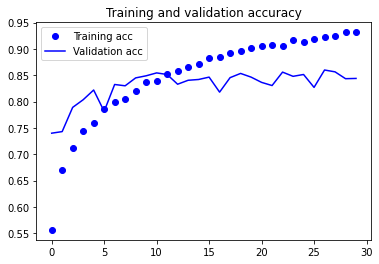

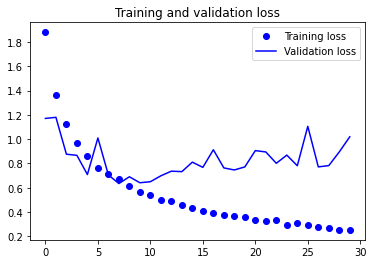

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8299999833106995


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_unfrozen_regularizer)(dw6).h5')
model2.save('food_model_(MobileNet_unfrozen_regularizer)(dw6)backup.h5')

### MobileNet unfrozen (All layers) + >regularizer + Dense512

In [0]:
# Build the Model
from tensorflow.keras.applications import MobileNet
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#MobileNet convbase
conv_base2 = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #MobileNet pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 87s 116ms/step - loss: 2.6220 - acc: 0.3268 - val_loss: 1.2736 - val_acc: 0.6905
Epoch 2/30
750/750 [==============================] - 86s 115ms/step - loss: 1.7136 - acc: 0.5588 - val_loss: 1.0261 - val_acc: 0.7520
Epoch 3/30
750/750 [==============================] - 86s 114ms/step - loss: 1.4258 - acc: 0.6381 - val_loss: 0.9009 - val_acc: 0.7885
Epoch 4/30
750/750 [==============================] - 86s 115ms/step - loss: 1.2348 - acc: 0.6839 - val_loss: 0.8819 - val_acc: 0.7980
Epoch 5/30
750/750 [==============================] - 85s 114ms/step - loss: 1.1306 - acc: 0.7101 - val_loss: 0.7178 - val_acc: 0.8165
Epoch 6/30
750/750 [==============================] - 86s 114ms/step - loss: 1.0366 - acc: 0.7283 - val_loss: 0.6909 - val_acc: 0.8335
Epoch 7/30
750/750 [========

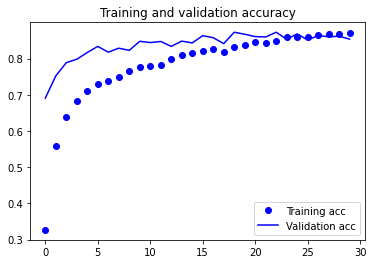

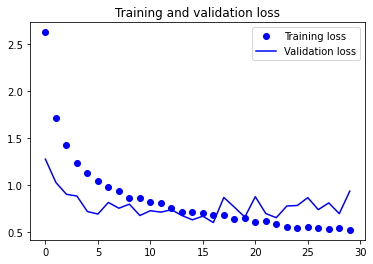

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8460000157356262


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_unfrozen_regularizer)v2.h5')
model2.save('food_model_(MobileNet_unfrozen_regularizer)v2backup.h5')

In [0]:
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 82s 109ms/step - loss: 0.5172 - acc: 0.8759 - val_loss: 0.7158 - val_acc: 0.8600
Epoch 2/30
750/750 [==============================] - 82s 109ms/step - loss: 0.5196 - acc: 0.8720 - val_loss: 0.7134 - val_acc: 0.8605
Epoch 3/30
750/750 [==============================] - 84s 111ms/step - loss: 0.5062 - acc: 0.8755 - val_loss: 0.8370 - val_acc: 0.8615
Epoch 4/30
750/750 [==============================] - 84s 112ms/step - loss: 0.5141 - acc: 0.8757 - val_loss: 1.0898 - val_acc: 0.8490
Epoch 5/30
750/750 [==============================] - 83s 111ms/step - loss: 0.4903 - acc: 0.8833 - val_loss: 0.8126 - val_acc: 0.8690
Epoch 6/30
750/750 [==============================] - 86s 115ms/step - loss: 0.4762 - acc: 0.8851 - val_loss: 0.7717 - val_acc: 0.8640
Epoch 7/30
750/750 [==============================] - 82s 109ms/step - loss: 0.4679 - acc: 0.8852 - val_loss: 0.8161 - val_acc: 0.8660
Epoch 8/30
750/750 [==============================] - 8

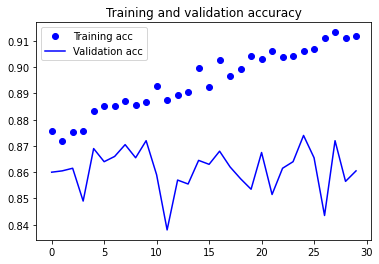

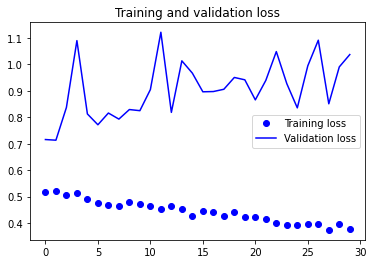

Found 500 images belonging to 10 classes.
test acc: 0.8579999804496765


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_unfrozen_regularizer)v2_1.h5')
model2.save('food_model_(MobileNet_unfrozen_regularizer)v2_1backup.h5')

In [0]:
#more epoch (total 100)
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3755 - acc: 0.9159 - val_loss: 0.9065 - val_acc: 0.8635
Epoch 2/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3571 - acc: 0.9152 - val_loss: 0.8136 - val_acc: 0.8745
Epoch 3/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3789 - acc: 0.9127 - val_loss: 1.0888 - val_acc: 0.8675
Epoch 4/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3795 - acc: 0.9131 - val_loss: 1.1148 - val_acc: 0.8610
Epoch 5/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3721 - acc: 0.9141 - val_loss: 1.2027 - val_acc: 0.8590
Epoch 6/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3739 - acc: 0.9129 - val_loss: 1.0861 - val_acc: 0.8565
Epoch 7/40
750/750 [==============================] - 82s 110ms/step - loss: 0.3645 - acc: 0.9155 - val_loss: 0.9163 - val_acc: 0.8735
Epoch 8/40
750/750 [==============================] - 8

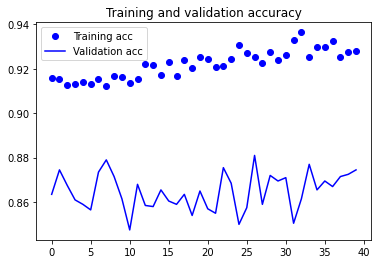

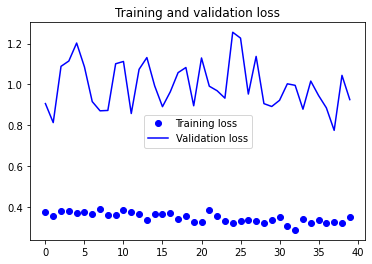

Found 500 images belonging to 10 classes.
test acc: 0.8759999871253967


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_unfrozen_regularizer)v2_2.h5')
model2.save('food_model_(MobileNet_unfrozen_regularizer)v2_2backup.h5')

### MobileNet (unfrozen) + >regularizer [fine-tune dw6]

In [0]:
# Build the Model
from tensorflow.keras.applications import MobileNet
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#MobileNet convbase
conv_base3 = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base3.trainable = True

set_trainable = False
for layer in conv_base3.layers:
    if layer.name == 'conv_dw_6': 
        set_trainable = True # after layer, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model3 = models.Sequential()
model3.add(conv_base3) #MobileNet pre-train
model3.add(layers.Flatten())
model3.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation='softmax'))


conv_base3.summary()
model3.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

history3 = model3.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/100
750/750 [==============================] - 92s 123ms/step - loss: 2.6043 - acc: 0.3371 - val_loss: 1.2886 - val_acc: 0.7005
Epoch 2/100
750/750 [==============================] - 92s 123ms/step - loss: 1.6870 - acc: 0.5724 - val_loss: 1.0123 - val_acc: 0.7715
Epoch 3/100
750/750 [==============================] - 92s 123ms/step - loss: 1.4237 - acc: 0.6380 - val_loss: 0.8640 - val_acc: 0.8065
Epoch 4/100
750/750 [==============================] - 96s 128ms/step - loss: 1.2746 - acc: 0.6825 - val_loss: 0.9381 - val_acc: 0.7950
Epoch 5/100
750/750 [==============================] - 93s 124ms/step - loss: 1.1608 - acc: 0.7008 - val_loss: 0.9166 - val_acc: 0.8040
Epoch 6/100
750/750 [==============================] - 95s 126ms/step - loss: 1.0893 - acc: 0.7135 - val_loss: 0.7471 - val_acc: 0.8265
Epoch 7/100
750/750 [==============================] - 97s 130ms/step - loss: 1.0223 - acc: 0.7272

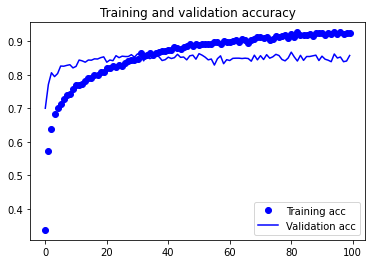

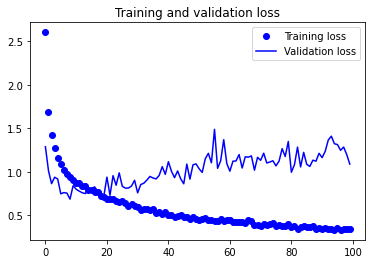

Found 500 images belonging to 10 classes.
test acc: 0.828000009059906


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs3 = range(len(acc3))

plt.plot(epochs3, acc3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model3.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model3.save(model_path+'food_model_(MobileNet_unfrozen_regularizer)v2(dw6).h5')
model3.save('food_model_(MobileNet_unfrozen_regularizer)v2(dw6)backup.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [0]:
# Model #1
model.load_weights('food_model_1.h5')




In [0]:
# Model #2
model.load_weights('food_model_2.h5')




In [0]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [0]:
# Load the model
model.load_weights('food_model_best.h5')

In [0]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [0]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [0]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)